<p style="font-family: times, serif; font-size:16pt; color:blue">Ejemplo de uso del set de datos patrimonio.csv</p>


In [119]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [120]:
df = pd.read_csv('monumentos.csv', encoding='utf_8')

In [121]:
# filter out years of modification
df0 = df.groupby(['nombre', 'localización']).first().reset_index()

In [122]:
def timeline(dates, names, title):
    '''
    Plot timeline.
    Adapted from https://matplotlib.org/stable/gallery/lines_bars_and_markers/timeline.html
    
    '''
    # Choose some nice levels
    levels = np.tile([-7, 7, -6, 6, -5, 5, -4, 4, -3, 3, -2, 2, -1, 1],
                     int(np.ceil(len(dates)/6)))[:len(dates)]

    # Create figure and plot a stem plot with the date
    fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)
    ax.set_title(title, fontsize=14, color='blue')

    markerline, stemline, baseline = ax.stem(dates, levels,
                                             linefmt="C3-", basefmt="k-",
                                             use_line_collection=True)

    plt.setp(markerline, mec="k", mfc="w", zorder=3)

    # Shift the markers to the baseline by replacing the y-data by zeros.
    markerline.set_ydata(np.zeros(len(dates)))

    # annotate lines
    vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
    for d, l, r, va in zip(dates, levels, names, vert):
        ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                    textcoords="offset points", va=va, ha="right")

    # format xaxis with 4 month intervals
    ax.get_xaxis().set_major_locator(mdates.YearLocator(2))
    ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%Y"))
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

    # remove y axis and spines
    ax.get_yaxis().set_visible(False)
    for spine in ["left", "top", "right"]:
        ax.spines[spine].set_visible(False)

    ax.margins(y=0.1)
    plt.show()

In [123]:
def timeline_loc(loc):
    '''
    Filtra por CCAA el df
    
    '''
    df1 = df0[df0['localización']==loc]
    dates = pd.to_datetime(df1['año'], format='%Y')
    names = df1['nombre']
    timeline(dates, names, 'Patrimonio de la Humanidad '+ loc)

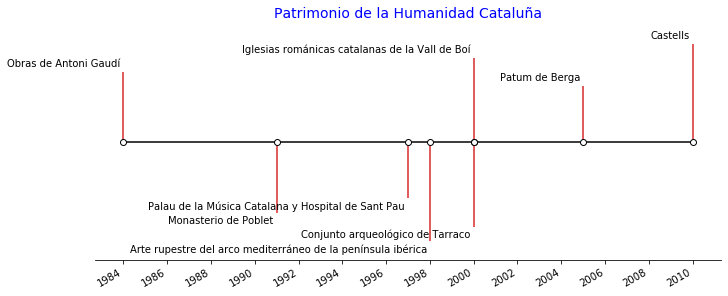

In [124]:
timeline_loc('Cataluña')

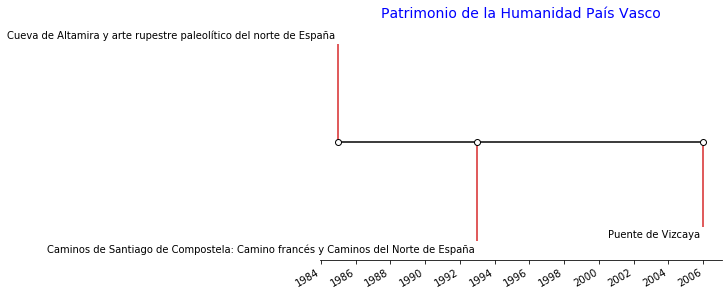

In [125]:
timeline_loc('País Vasco')

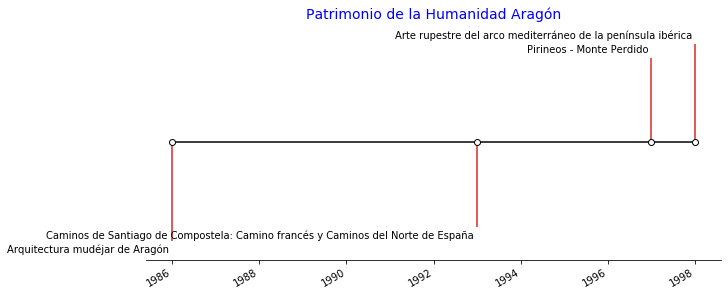

In [126]:
timeline_loc('Aragón')

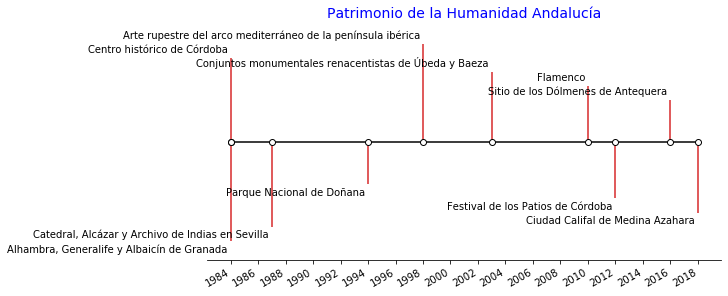

In [127]:
timeline_loc('Andalucía')

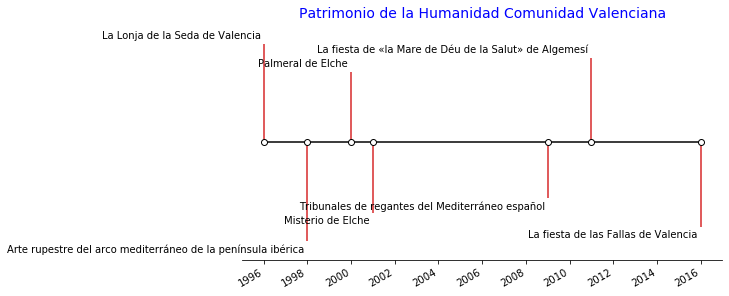

In [128]:
timeline_loc('Comunidad Valenciana')

In [129]:
from IPython.display import display, HTML
df2 = df0.groupby(['tipo', 'localización'])["nombre"].count(). reset_index()
display(HTML(df2.to_html()))

,tipo,localización,nombre
0,Bien cultural,Andalucía,7
1,Bien cultural,Aragón,3
2,Bien cultural,Asturias,3
3,Bien cultural,Baleares,1
4,Bien cultural,Canarias,2
5,Bien cultural,Cantabria,2
6,Bien cultural,Castilla y León,8
7,Bien cultural,Castilla-La Mancha,4
8,Bien cultural,Cataluña,6
9,Bien cultural,Comunidad Valenciana,3
